In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random 
from   itertools import product
from   collections import Counter

## Problem 1: Generalized dice
### 1.Modify your computer program to simulate the roll of N dice. Your program should let the dice have any number of sides, but the same number of sides for each die. The number of dice and the number of sides should be read in at the start of the program. One trial will consist of N rolls. Your program should calculate the sum of the N numbers that occur during each trial. It should also compare the results for the mean, variance, and standard deviation of that sum with the theoretical predictions.

sides    numbers
 4             3
 6             3
------------------------------------
sum        count
 6             8
 7            48
 8           148
 9           392
10           906
11          1674
12          2855
13          4402
14          6117
15          7906
16          9410
17         10546
18         11182
19         10635
20          9477
21          7725
22          6143
23          4382
24          2848
25          1702
26           903
27           404
28           139
29            43
30             5
average:      17.9974    
variance:     12.4573    
deviation:    3.5295     


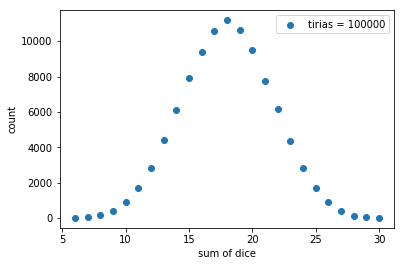

In [3]:
def dice(s):
    """ given how many sides, return one trial of throwing a dice of s sides"""
    return random.randint(1,s)

def one_trial(*pairs): #(sides,numbers)
    """given the sides and numbers of dices,return the result of one trial"""
    result = []
    for pair in pairs:
        sides,numbers = pair
        result += [dice(sides) for _ in range(numbers)]
    return result

def sum_dices(*pairs,N=100):
    """given N trials, return the sum of the dices"""
    count = Counter([sum(one_trial(*pairs)) for _ in range(N)])
    return count

def display(*pairs,trials=100):
    print("sides"+" "*4+"numbers")
    for pair in pairs:
        print("{:2}{:>14}".format(pair[0],pair[1]))
    result = sum_dices(*pairs,N=trials)
    order  = sorted(result.keys())
    print("------------------------------------")
    print("sum"+" "*8+"count")
    for o in order:
        print("{:2}{:>14}".format(o,result[o]))
    cal_a  = sum([num*times/trials for (num,times) in result.items()])
    cal_v  = sum([num**2*times/trials for (num,times) in result.items() ])-cal_a**2
    cal_s  = cal_v**(1/2)
    print("average:  {:^15.4f}".format(cal_a))
    print("variance: {:^15.4f}".format(cal_v))
    print("deviation:{:^15.4f}".format(cal_s))
    X,Y = zip(*result.items())
    plt.scatter(X,Y,label="tirias = {:d}".format(trials))
    plt.xlabel("sum of dice")
    plt.ylabel("count")
    plt.legend(loc=1)
display((4,3),(6,3),trials=100000)

As for the theoretical calculation, I can solve it with some simple summention formulas, therefore I would trust the result would bet the same as we assume the probability is uniform and then calculate the mean,variance and standard deviation.

predict average  = 6.0
predict variance = 4.166666666666664
predict standard deviation = 2.0412414523193143
sides    numbers
 4             1
 6             1
------------------------------------
sum        count
 2           430
 3           878
 4          1255
 5          1602
 6          1647
 7          1695
 8          1288
 9           810
10           395
average:      5.9815     
variance:     4.1858     
deviation:    2.0459     
None


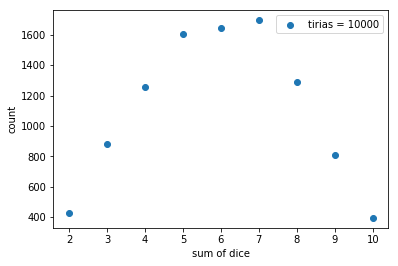

In [37]:
def situations(*pairs):
    """given the pairs of (sides,numbers) and return all the situation of one trial"""
    def calculate(pairs):
        if  len(pairs)==1:
            pair = pairs[0]
            sides,numbers = pair[0],pair[1]
            return list(map("".join,product(''.join([str(s) for s in range(1,sides+1)]),repeat=numbers)))
        elif len(pairs)>=2:
            return [a+b for a,b in product(calculate([pairs[0]]),calculate(pairs[1:]))]
    return calculate(pairs)
def predict_sum(total_situations):
    count = Counter(list(map(sum,[[int(x) for x in s] for s in total_situations])))
    pre_a  = sum([num*times/len(total_situations) for (num,times) in count.items()])
    pre_v  = sum([num**2*times/len(total_situations) for (num,times) in count.items() ])-pre_a**2
    pre_s  = pre_v**(1/2)
    return pre_a,pre_v,pre_s

total = (situations((4,1),(6,1)))
print("predict average  = {}".format(predict_sum(total)[0]))
print("predict variance = {}".format(predict_sum(total)[1]))
print("predict standard deviation = {}".format(predict_sum(total)[2]))
print(display((4,1),(6,1),trials=10000))

Roughly right, if we increase the trials, these two would be closer. <br>
Something interesting is that we find **the average,variance of the sum is the same as the sum of individual average and variance **

In [34]:
test1 = predict_sum(situations((4,1),(6,2)))
test2 = predict_sum(situations((6,2)))
individual_sum = list(map(lambda x,y: x+y,test1,test2))
print(test1)
print(test2)
print(individual_sum)

(9.5, 7.083333333333329, 2.6614532371118846)
(7.000000000000001, 5.833333333333314, 2.415229457698236)
[16.5, 12.916666666666643, 5.0766826948101205]


The average is not so surprising, for we know the average itself is a linear calculation. 
But what about variance? <br>
I spent some time searching and find some useful infomation.https://stats.stackexchange.com/questions/184998/the-linearity-of-variance . Roughly, if two random variables are indepdent, then the sum of variance would be the same as variance of the sum of these two random variable. Which specify the situation we encounter.

### 2.Test the calculations that we have carried out for the mean, variance, and standard deviation of the sum of the numbers on the dice. In each case, obtain data for a couple of different run-lengths. Investigate the cases listed below. (a) Two dice, each with ten sides. (b) Ten dice, each with twenty sides.

sides    numbers
10             2
------------------------------------
sum        count
 2             5
 3            23
 4            30
 5            41
 6            51
 7            59
 8            64
 9            66
10           100
11            92
12            89
13            79
14            76
15            65
16            43
17            44
18            40
19            19
20            14
average:      11.1720    
variance:     17.0504    
deviation:    4.1292     


sides    numbers
10             2
------------------------------------
sum        count
 2            86
 3           214
 4           326
 5           374
 6           528
 7           590
 8           686
 9           820
10           889
11           917
12           947
13           788
14           681
15           588
16           511
17           410
18           322
19           220
20           103
average:      11.0275    
variance:     16.8447    
deviation:    4.1042     


sides    numbers
1

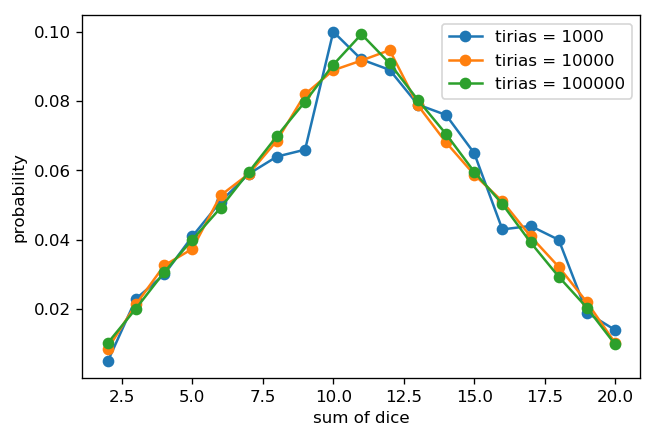

In [40]:
def display_modified(*pairs,trials=10000):
    print("sides"+" "*4+"numbers")
    for pair in pairs:
        print("{:2}{:>14}".format(pair[0],pair[1]))
    result = sum_dices(*pairs,N=trials)
    order  = sorted(result.keys())
    print("------------------------------------")
    print("sum"+" "*8+"count")
    for o in order:
        print("{:2}{:>14}".format(o,result[o]))
    cal_a  = sum([num*times/trials for (num,times) in result.items()])
    cal_v  = sum([num**2*times/trials for (num,times) in result.items() ])-cal_a**2
    cal_s  = cal_v**(1/2)
    print("average:  {:^15.4f}".format(cal_a))
    print("variance: {:^15.4f}".format(cal_v))
    print("deviation:{:^15.4f}".format(cal_s))
    print('\n')
    X,Y = zip(*sorted(result.items()))
    Y   = [y/trials for y in Y]
    plt.plot(X,Y,"o-",label="tirias = {:d}".format(trials))
    plt.xlabel("sum of dice")
    plt.ylabel("probability")
    plt.legend(loc=1)
Trials = [10**i for i in range(3,6)]
plt.figure(dpi=120)
for trials in Trials:
    display_modified((10,2),trials=trials)


To compare different trials, I modified the display function. <br>
That is to say, I change y axis from count to probability. This way we can plot different trials in the same scale.<br>
Also,from the figure we can see if we increase the trials, the fluctuation would become much less and the result become more smooth. <br>



sides    numbers
20            10
------------------------------------
sum        count
49             1
54             2
55             1
59             1
63             1
64             4
65             3
66             3
67             4
68             1
69             2
70             1
71             6
72             3
73             7
74             6
75             5
76             5
77             8
78             7
79            14
80             8
81             8
82            11
83            14
84            13
85            10
86            13
87            20
88            17
89            17
90            10
91            20
92            12
93            15
94            18
95            16
96            24
97            24
98            26
99            21
100            21
101            29
102            23
103            19
104            17
105            17
106            26
107            14
108            20
109            26
110            26
111            22

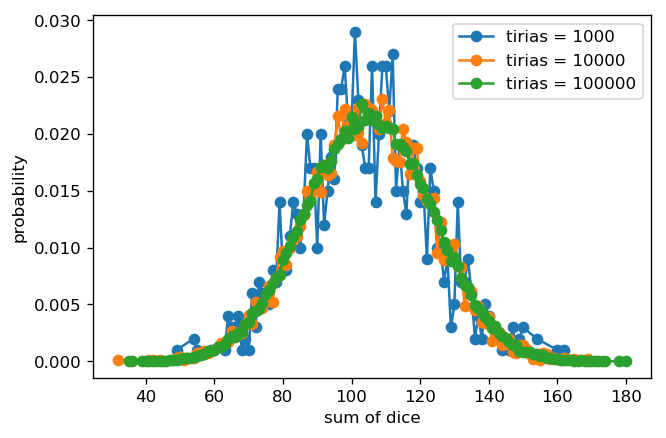

In [38]:
Trials = [10**i for i in range(3,6)]
plt.figure(dpi=120)
for trials in Trials:
    display_modified((20,10),trials=trials)

### 3.Use your program to investigate the width of the distribution for various numbers of two-sided dice. Does the width of the distribution increase or decrease with increasing numbers of dice? Do your results agree with the theory?

sides    numbers
 2             2
variance:     1.9836     
deviation:    1.4084     


sides    numbers
 2             6
variance:     6.1135     
deviation:    2.4725     


sides    numbers
 2            10
variance:     10.0848    
deviation:    3.1757     


sides    numbers
 2            14
variance:     14.0124    
deviation:    3.7433     


sides    numbers
 2            30
variance:     29.6234    
deviation:    5.4427     




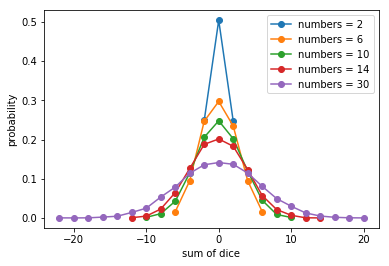

In [5]:
Numbers = [x for x in range(2,17,4)]
def dice(s):
    """ given how many sides, return one trial of throwing a dice of s sides"""
    return 2*random.randint(0,s-1)-1
def display_modified_2(*pairs,trials=10000):
    print("sides"+" "*4+"numbers")
    for pair in pairs:
        print("{:2}{:>14}".format(pair[0],pair[1]))
    result = sum_dices(*pairs,N=trials)
    cal_a  = sum([num*times/trials for (num,times) in result.items()])
    cal_v  = sum([num**2*times/trials for (num,times) in result.items() ])-cal_a**2
    cal_s  = cal_v**(1/2)
    print("variance: {:^15.4f}".format(cal_v))
    print("deviation:{:^15.4f}".format(cal_s))
    print('\n')
    X,Y = zip(*sorted(result.items()))
    Y   = [y/trials for y in Y]
    pair= pairs[0]
    plt.plot(X,Y,"o-",label="numbers = {:d}".format(pair[1]))
    plt.xlabel("sum of dice")
    plt.ylabel("probability")
    plt.legend(loc=1)
for numbers in Numbers:
    display_modified_2((2,numbers))

display_modified_2((2,30))

I make a shift for sides of coin (if the dice has only two sides, I prefer call it a coin)  <br>
And let the sides from (1,2) -> (-1,1). This way we can have a common start for all the numbers (that is 0) <br>
From the figure, we find as we increase the numbers, the probability become smooth and the width of distribution become larger (we can see that from standard deviation directly)

# Problem 2: Computer simulations of mismatched dice

### 1.Write a computer program to compute the probability distribution for the sum of two dice when each die has an arbitrary number of sides. Run your program for dice of four and six sides.

sides    numbers
 4             1
 6             1
------------------------------------
sum        count
 2          4226
 3          8264
 4         12480
 5         16523
 6         16562
 7         16886
 8         12597
 9          8302
10          4160
average:      6.0045     
variance:     4.1699     
deviation:    2.0420     


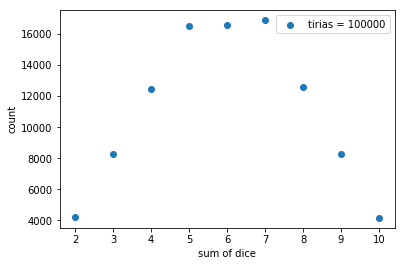

In [55]:
def dice(s):
    """ given how many sides, return one trial of throwing a dice of s sides"""
    return random.randint(1,s)
display((4,1),(6,1),trials=10**5)

### Modify the computer program you wrote for the previous problem to compute the probability distribution for the sum of three dice when each die has an arbitrary number of sides. Run your program once for all dice having six sides, and once for any combination you think interesting.

sides    numbers
 2             1
 3             1
10             1
------------------------------------
sum        count
 3          1683
 4          5014
 5          8388
 6         10061
 7         10006
 8          9927
 9          9998
10          9966
11         10067
12          9796
13          8296
14          5123
15          1675
average:      8.9949     
variance:     9.2015     
deviation:    3.0334     


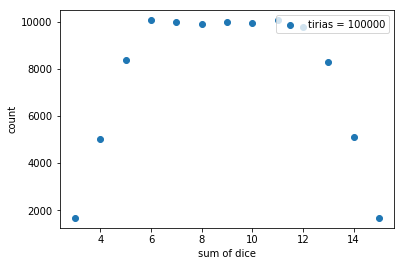

In [67]:
display((2,1),(3,1),(10,1),trials=100000)